## 正則化項

### Ridge

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")

In [83]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [84]:
# 欠損値対応
df.dropna(inplace=True)

In [85]:
# データ準備
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

# 標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

# ダミー変数作成は数値カラムのリスト作成の後
X = pd.get_dummies(X, drop_first=True)

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# モデル学習
ridge = Ridge()
ridge.fit(X_train, y_train)

# 予測
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [86]:
mse

118513.26135456536

In [87]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

251.01058042384858

In [88]:
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [89]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [90]:
# 正則化項なしの線形回帰と比較
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

### さまざまなλでのRidge

In [91]:
alphas = np.logspace(-3, 3)
mse_list = []
coefs = []

In [92]:
for alpha in alphas:
    # モデル学習
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # 予測
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

Text(0, 0.5, 'test MSE')

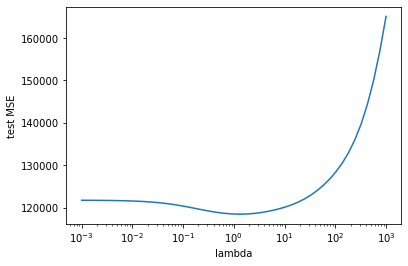

In [93]:
# λ vs MSE
import matplotlib.pyplot as plt
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test MSE')

Text(0, 0.5, 'standardized coefficients')

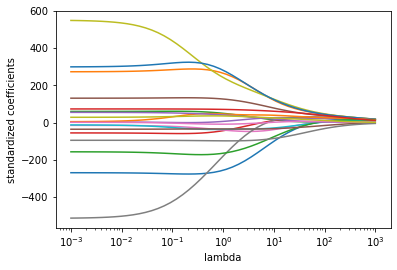

In [94]:
# λ vs 係数
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')

### Lasso

In [95]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

117768.90478161343
250.24481877112984


In [96]:
lasso.coef_

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

In [97]:
# ridgeと比較
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [98]:
# 正則化項なしの線形回帰と比較
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

### さまざまなλでのLasso

In [99]:
alphas = np.logspace(-1, 3)
mse_list = []
coefs = []

for alpha in alphas:
    # モデル学習
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)

    # 予測
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

Text(0, 0.5, 'test MSE')

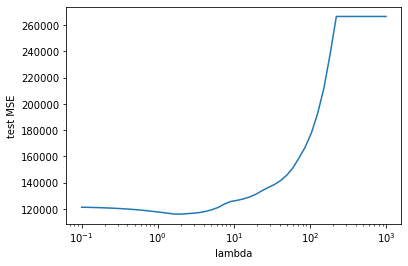

In [100]:
# λ vs MSE
plt.plot(alphas, mse_list)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('test MSE')

Text(0, 0.5, 'standardized coefficients')

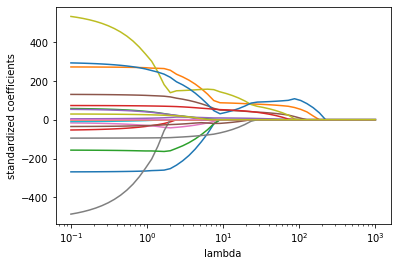

In [101]:
# λ vs 係数
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficients')

In [102]:
alphas[np.argmin(mse_list)]

2.0235896477251565

In [103]:
np.min(mse_list)

116122.45120731383

In [104]:
lasso = Lasso(alpha=alphas[np.argmin(mse_list)])
lasso.fit(X_train, y_train)

Lasso(alpha=2.0235896477251565)

In [105]:
lasso.coef_

array([-252.19222786,  254.95517425,   26.34476738,  -11.1644903 ,
         11.55462205,  117.61960902,  -41.9368323 ,   -0.        ,
        139.31490657,   -0.        ,  218.61993867,    0.        ,
       -159.99440584,   68.72670632,   26.06178039,  -25.04508935,
          0.        ,  -92.29918255,   21.63684134])

In [106]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [107]:
pd.DataFrame({'coef': lasso.coef_, 'column_name': X_train.columns.to_list()})

,coef,column_name
0,-252.192228,AtBat
1,254.955174,Hits
2,26.344767,HmRun
3,-11.164490,Runs
4,11.554622,RBI
5,117.619609,Walks
6,-41.936832,Years
7,-0.000000,CAtBat
8,139.314907,CHits
9,-0.000000,CHmRun
